In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 203MB/s]
100% 1.06G/1.06G [00:11<00:00, 102MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [6]:
conv_base=VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [9]:
conv_base.trainable=False


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#normalization
def process(image,label):
    image=tensorflow.cast(image/255.,tensorflow.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [13]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [14]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 95ms/step - loss: 0.2716 - accuracy: 0.8835 - val_loss: 0.2360 - val_accuracy: 0.8948
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1938 - accuracy: 0.9181 - val_loss: 0.2495 - val_accuracy: 0.8896
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1628 - accuracy: 0.9317 - val_loss: 0.2237 - val_accuracy: 0.9084
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1353 - accuracy: 0.9463 - val_loss: 0.2206 - val_accuracy: 0.9150
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1106 - accuracy: 0.9535 - val_loss: 0.2536 - val_accuracy: 0.9052
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0865 - accuracy: 0.9667 - val_loss: 0.2438 - val_accuracy: 0.9140
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0656 - accuracy: 0.9751 - val_loss: 0.2763 - val_accur

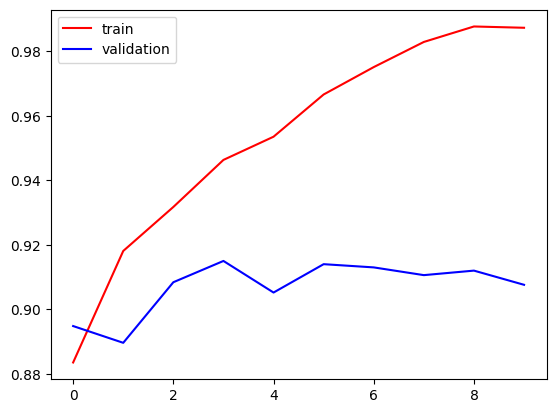

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()

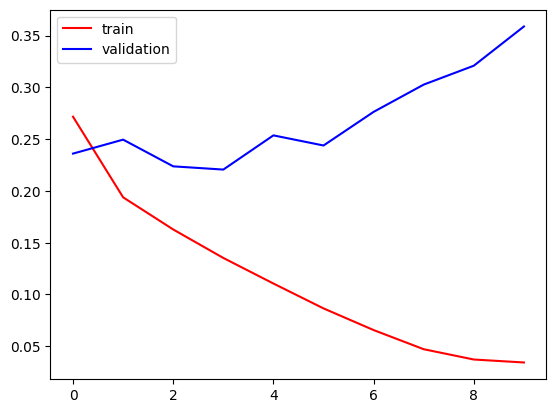

In [16]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.legend()
plt.show()